# Demo 
___

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from phonemedata import *
from encoder import *
from tripletLoss import *

### 1. Chargement des données 

* UCR : https://www.cs.ucr.edu/~eamonn/time_series_data_2018/

* UEA : http://www.timeseriesclassification.com/

* Consommation éléctrique (puissance énergétique) journalière individuelle : https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

In [2]:
dataset = PhonemeDataset()

In [3]:
dataset[0]

(tensor([[ 4.8336e-01,  1.5981e-01, -1.3267e-01,  ...,  3.9973e-03,
           3.4639e-03,  1.9926e-04]]),
 tensor(1))

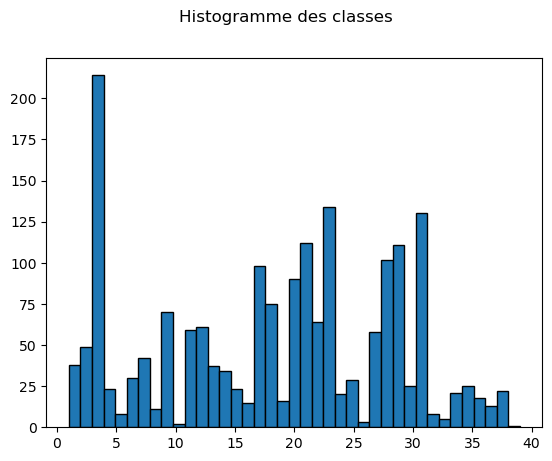

In [4]:
classes = []
for i in range(len(dataset)):
    _, label  = dataset[i]
    classes.append(label.item())

plt.hist(classes, bins=39, edgecolor='k')
plt.suptitle('Histogramme des classes')
plt.show()

In [5]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


### 2. Modèles + entrainements

In [6]:
from encoder import *

In [7]:
in_channels = 1          # nombre de canaux du signal d'entrée (en pratique un)
out_channels = 320       # dimensionalité souhaitée pour la représentation abstraite du signal
kernel_size = 3          # taille du noyau de convolution
depth = 10               # profondeur de convolutions dilatées
hidden_channels = 40     # nombre de canaux cachés des convolutions dilatées
lr = 0.001               # taux d'apprentissage initial
CNN_out_channels = 160   # nombre de canaux sortants de convolutions

In [8]:
Model = Encoder(
    in_channels=in_channels, 
    hidden_CNN_channels=hidden_channels, 
    hidden_out_CNN_channels=CNN_out_channels, 
    out_channels=out_channels, 
    CNN_depth=depth, 
    kernel_size=kernel_size, 
)

In [9]:
train = torch.tensor(np.array([x for x, _ in dataset]))

In [10]:
from tripletLoss import TripletLoss
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train.to(device)
Model.to(device)

criterion = TripletLoss(50, 10, 1).to(device)

optimizer = torch.optim.Adam(Model.parameters(), lr=lr)

n_epochs = 40

for epoch in range(n_epochs):

    loss_items = []

    for X, _ in tqdm(dataloader):

        X = X.to(device)

        optimizer.zero_grad()

        loss = criterion(X, Model, train)

        loss.backward()

        optimizer.step()

        loss_items.append(loss.item())

    print(f'  - Epoch {epoch+1}/{n_epochs}, Loss: {np.mean(loss_items):.4f}  ')

    if epoch%5 == 0:
        torch.save(Model.state_dict(), f'pths/model_{epoch}.pt')




100%|██████████| 60/60 [00:12<00:00,  4.69it/s]


  - Epoch 1/40, Loss: 3.1493  


100%|██████████| 60/60 [00:11<00:00,  5.32it/s]


  - Epoch 2/40, Loss: 1.1112  


100%|██████████| 60/60 [00:11<00:00,  5.41it/s]


  - Epoch 3/40, Loss: 1.0337  


100%|██████████| 60/60 [00:11<00:00,  5.45it/s]


  - Epoch 4/40, Loss: 1.0340  


100%|██████████| 60/60 [00:11<00:00,  5.41it/s]


  - Epoch 5/40, Loss: 1.0221  


100%|██████████| 60/60 [00:11<00:00,  5.40it/s]


  - Epoch 6/40, Loss: 0.9925  


100%|██████████| 60/60 [00:11<00:00,  5.42it/s]


  - Epoch 7/40, Loss: 1.0013  


100%|██████████| 60/60 [00:11<00:00,  5.40it/s]


  - Epoch 8/40, Loss: 0.9817  


100%|██████████| 60/60 [00:11<00:00,  5.36it/s]


  - Epoch 9/40, Loss: 1.0003  


100%|██████████| 60/60 [00:10<00:00,  5.49it/s]


  - Epoch 10/40, Loss: 0.9832  


100%|██████████| 60/60 [00:10<00:00,  5.48it/s]


  - Epoch 11/40, Loss: 0.9577  


100%|██████████| 60/60 [00:11<00:00,  5.43it/s]


  - Epoch 12/40, Loss: 0.9672  


100%|██████████| 60/60 [00:10<00:00,  5.47it/s]


  - Epoch 13/40, Loss: 0.9561  


100%|██████████| 60/60 [00:11<00:00,  5.44it/s]


  - Epoch 14/40, Loss: 0.9425  


100%|██████████| 60/60 [00:11<00:00,  5.13it/s]


  - Epoch 15/40, Loss: 0.9521  


100%|██████████| 60/60 [00:11<00:00,  5.31it/s]


  - Epoch 16/40, Loss: 0.9409  


100%|██████████| 60/60 [00:11<00:00,  5.34it/s]


  - Epoch 17/40, Loss: 0.9201  


100%|██████████| 60/60 [00:10<00:00,  5.46it/s]


  - Epoch 18/40, Loss: 0.9463  


100%|██████████| 60/60 [00:10<00:00,  5.53it/s]


  - Epoch 19/40, Loss: 0.9330  


100%|██████████| 60/60 [00:10<00:00,  5.53it/s]


  - Epoch 20/40, Loss: 0.9254  


100%|██████████| 60/60 [00:10<00:00,  5.58it/s]


  - Epoch 21/40, Loss: 0.9243  


100%|██████████| 60/60 [00:10<00:00,  5.53it/s]


  - Epoch 22/40, Loss: 0.9042  


100%|██████████| 60/60 [00:10<00:00,  5.57it/s]


  - Epoch 23/40, Loss: 0.9028  


100%|██████████| 60/60 [00:10<00:00,  5.50it/s]


  - Epoch 24/40, Loss: 0.9404  


100%|██████████| 60/60 [00:11<00:00,  5.44it/s]


  - Epoch 25/40, Loss: 0.9349  


100%|██████████| 60/60 [00:10<00:00,  5.48it/s]


  - Epoch 26/40, Loss: 0.9066  


100%|██████████| 60/60 [00:10<00:00,  5.50it/s]


  - Epoch 27/40, Loss: 0.9244  


100%|██████████| 60/60 [00:10<00:00,  5.54it/s]


  - Epoch 28/40, Loss: 0.9222  


100%|██████████| 60/60 [00:10<00:00,  5.55it/s]


  - Epoch 29/40, Loss: 0.9098  


100%|██████████| 60/60 [00:10<00:00,  5.51it/s]


  - Epoch 30/40, Loss: 0.9091  


100%|██████████| 60/60 [00:10<00:00,  5.49it/s]


  - Epoch 31/40, Loss: 0.8909  


100%|██████████| 60/60 [00:10<00:00,  5.50it/s]


  - Epoch 32/40, Loss: 0.9018  


100%|██████████| 60/60 [00:11<00:00,  5.44it/s]


  - Epoch 33/40, Loss: 0.9111  


100%|██████████| 60/60 [00:11<00:00,  5.44it/s]


  - Epoch 34/40, Loss: 0.9212  


100%|██████████| 60/60 [00:10<00:00,  5.48it/s]


  - Epoch 35/40, Loss: 0.9043  


100%|██████████| 60/60 [00:11<00:00,  5.44it/s]


  - Epoch 36/40, Loss: 0.9321  


100%|██████████| 60/60 [00:10<00:00,  5.60it/s]


  - Epoch 37/40, Loss: 0.8863  


100%|██████████| 60/60 [00:10<00:00,  5.47it/s]


  - Epoch 38/40, Loss: 0.8892  


100%|██████████| 60/60 [00:11<00:00,  5.40it/s]


  - Epoch 39/40, Loss: 0.8978  


100%|██████████| 60/60 [00:11<00:00,  5.34it/s]

  - Epoch 40/40, Loss: 0.9717  


### 3. Résultats

In [11]:
x, _ = dataset[0]
x = x.to(device)

Model.eval()
with torch.no_grad():
    res = Model(train.to(device))

In [12]:
res.squeeze().shape

torch.Size([1896, 320])

In [13]:
torch.cuda.empty_cache()

In [14]:
res = []
with torch.no_grad():
    res = [Model(train[i].to(device).unsqueeze(0)) for i in range(train.size(0))]
    res = torch.stack(res)

In [15]:
res.shape

torch.Size([1896, 1, 320])

(1896, 320)


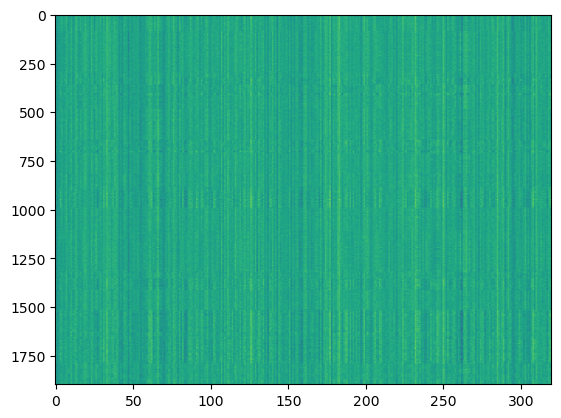

In [16]:
import matplotlib.pyplot as plt

print(res.cpu().numpy().squeeze().shape)

train_projection = res.cpu().numpy().squeeze()

plt.imshow(train_projection, cmap='viridis', aspect='auto')

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_result = pca.fit_transform(train_projection)

pca_result

array([[ 0.7978723 , -0.10572044],
       [-0.6076234 ,  0.05507154],
       [ 0.7553146 , -0.17834565],
       ...,
       [ 0.2520758 ,  0.17473273],
       [ 0.9818226 , -0.5156018 ],
       [-0.3258433 ,  0.15042467]], dtype=float32)

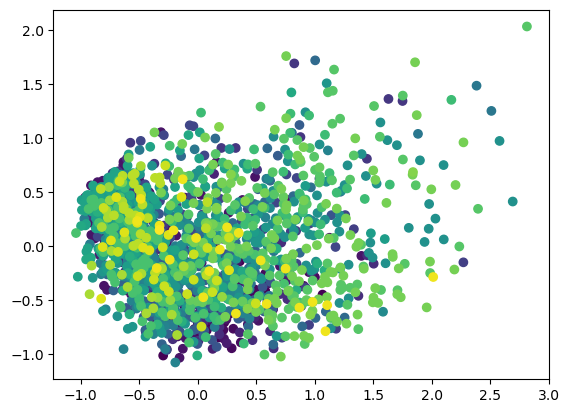

In [18]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=classes, cmap='viridis')